In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
for column in df.columns:
    print("{} has {} unique values".format(column, len(df[column].unique())))

ph has 2786 unique values
Hardness has 3276 unique values
Solids has 3276 unique values
Chloramines has 3276 unique values
Sulfate has 2496 unique values
Conductivity has 3276 unique values
Organic_carbon has 3276 unique values
Trihalomethanes has 3115 unique values
Turbidity has 3276 unique values
Potability has 2 unique values


In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


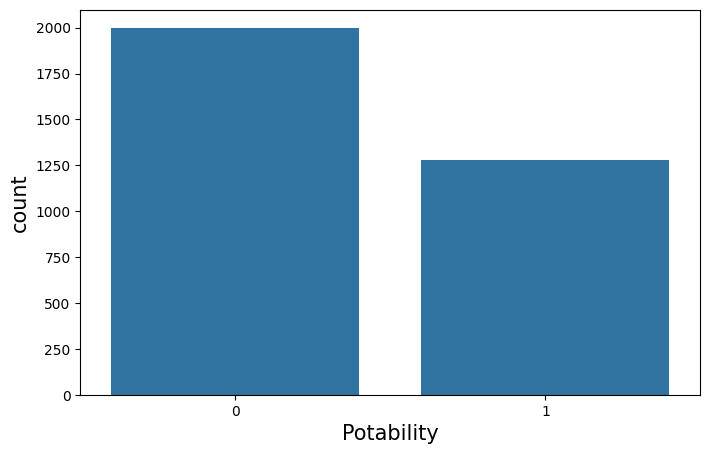

In [9]:
pot_lbl = df.Potability.value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=pot_lbl.index, y=pot_lbl);
plt.xlabel('Potability', fontsize=15)
plt.ylabel('count', fontsize=15);

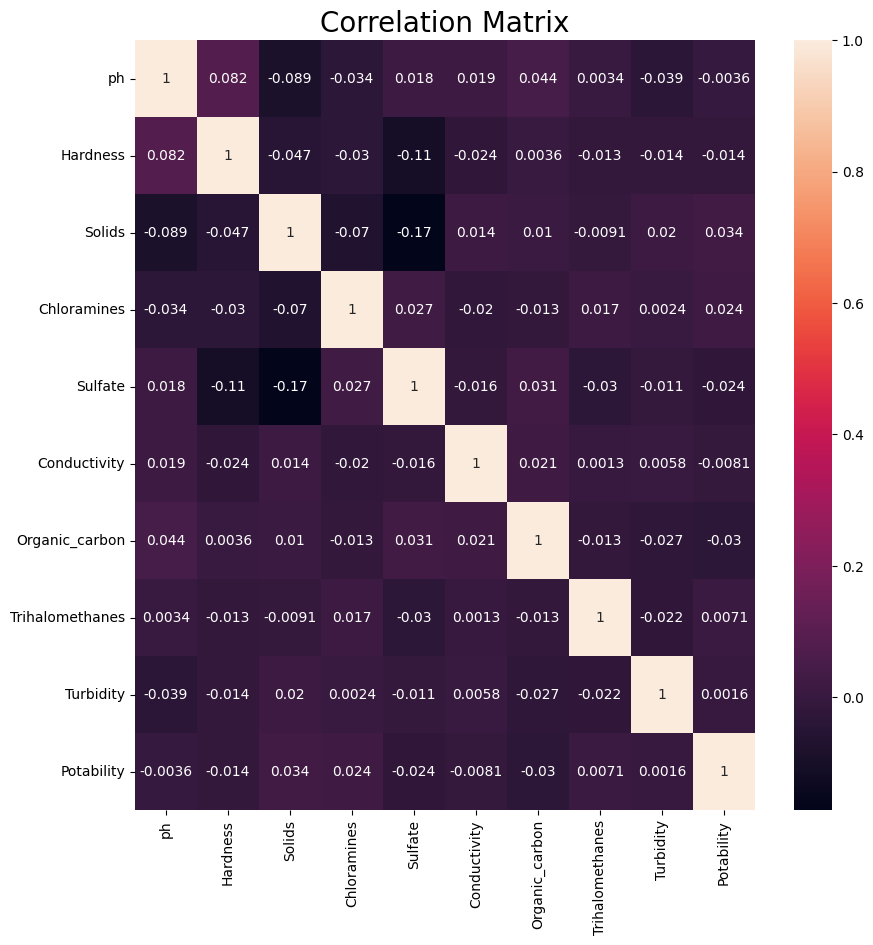

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

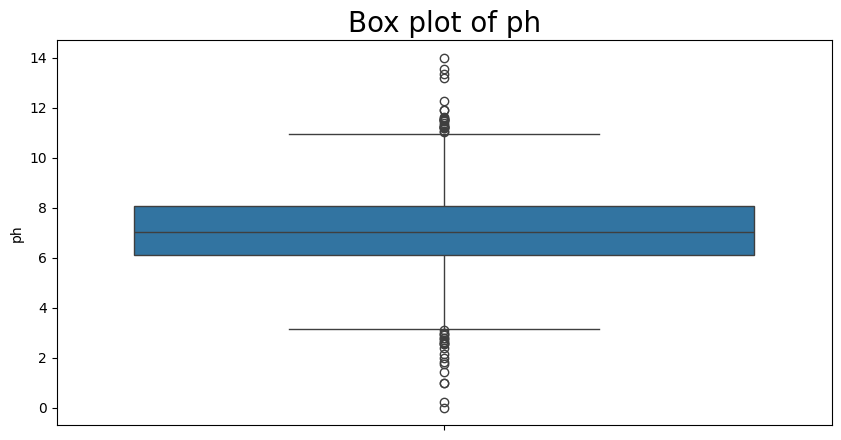

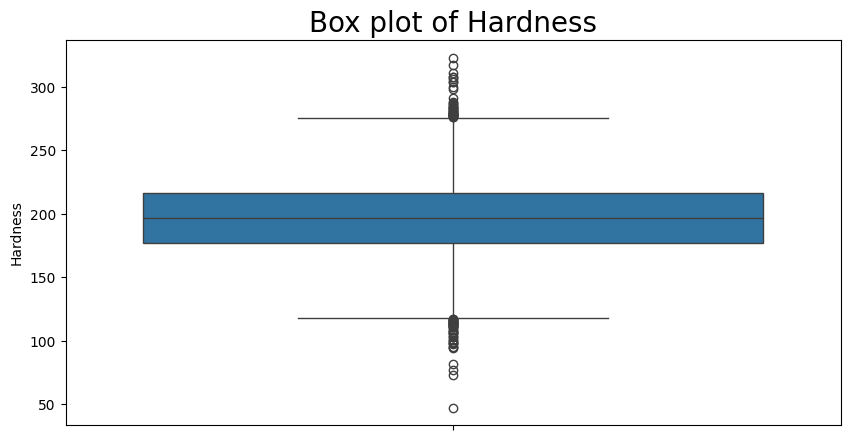

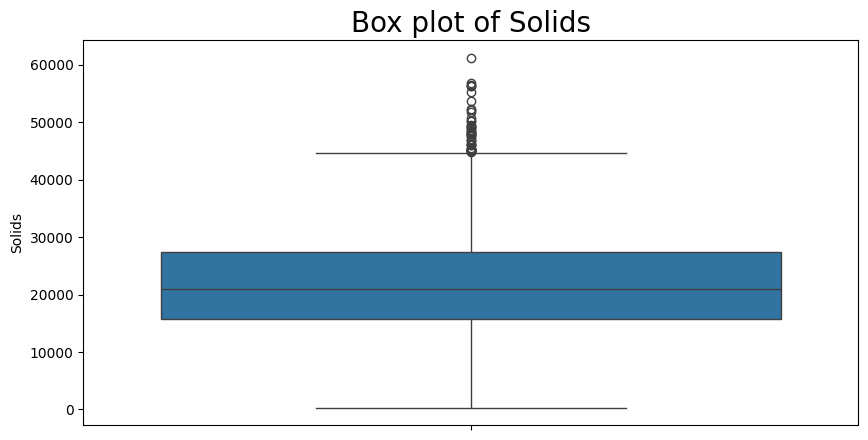

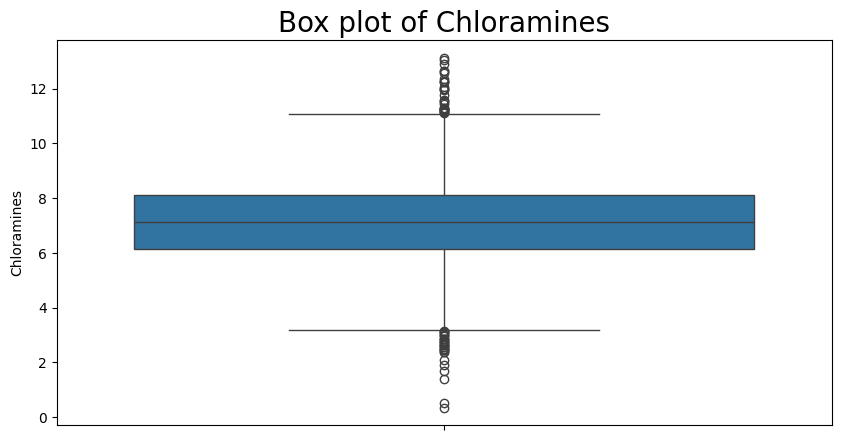

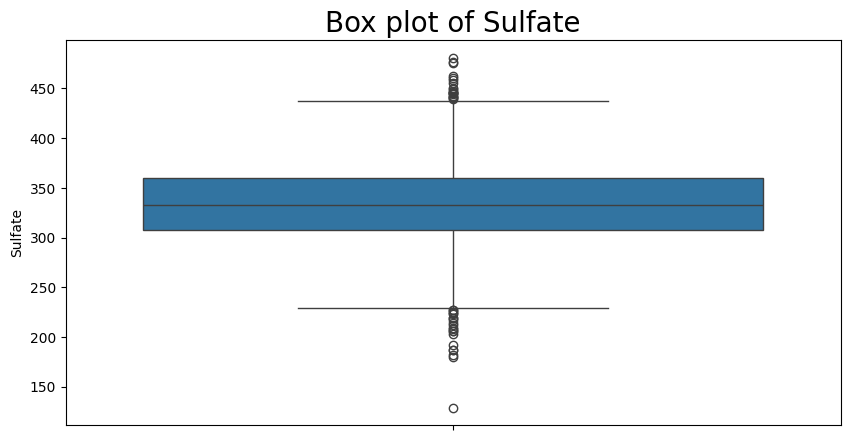

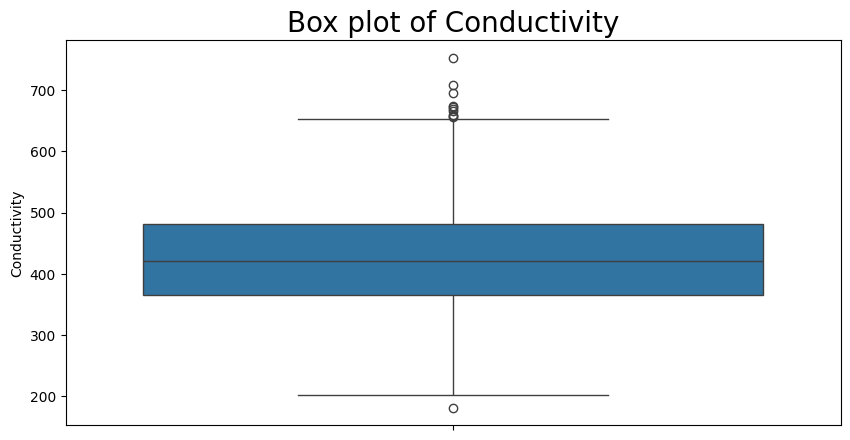

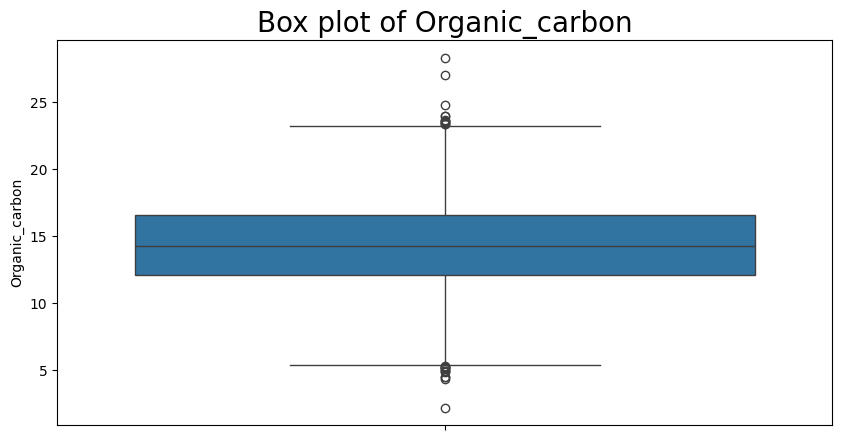

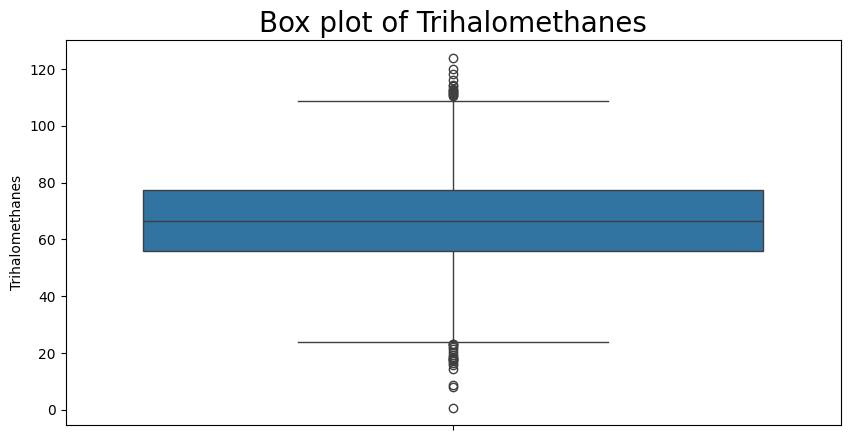

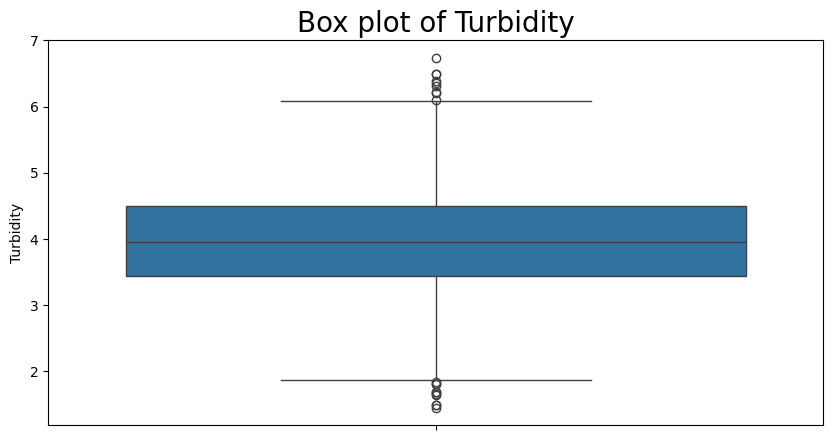

In [11]:
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[column])
    plt.title('Box plot of {}'.format(column), fontsize=20);

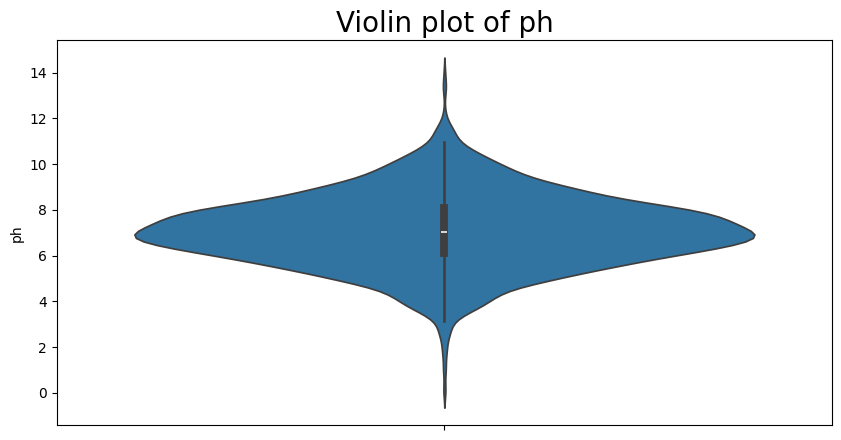

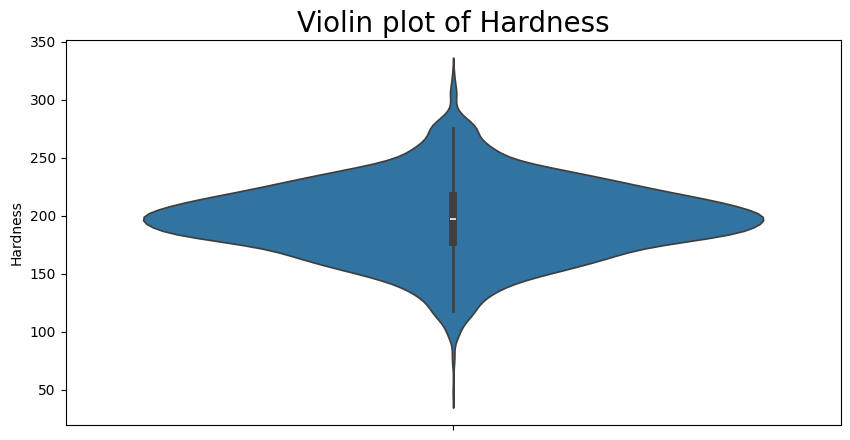

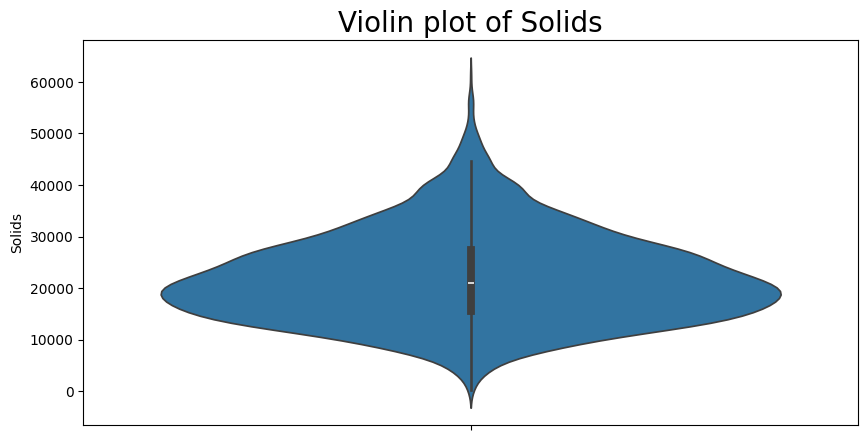

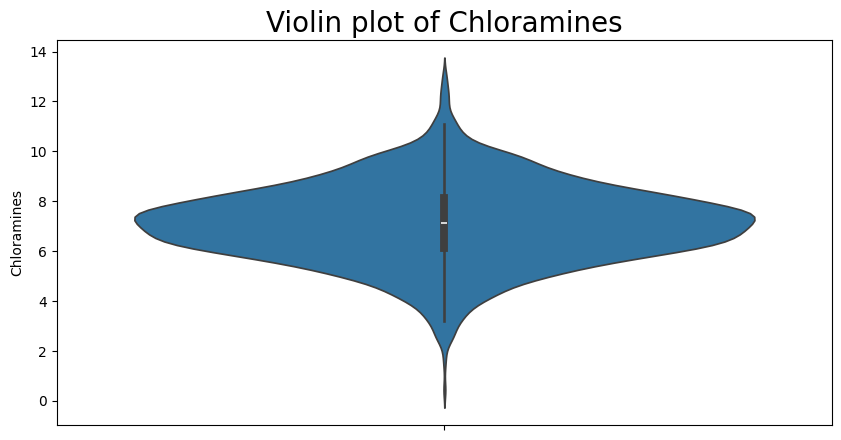

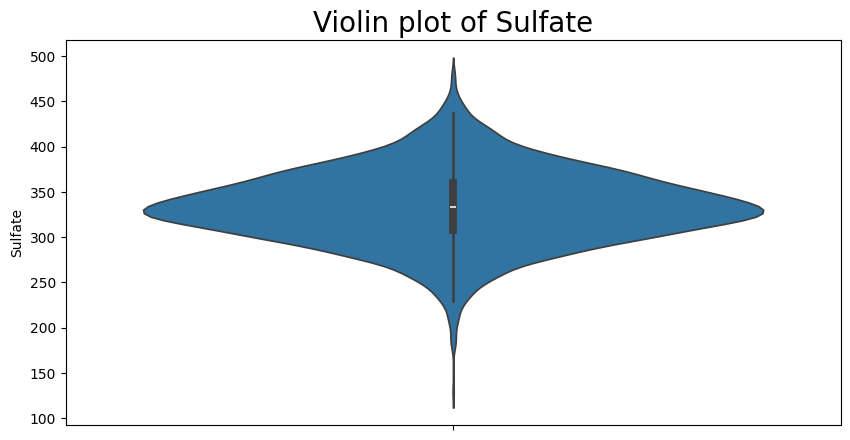

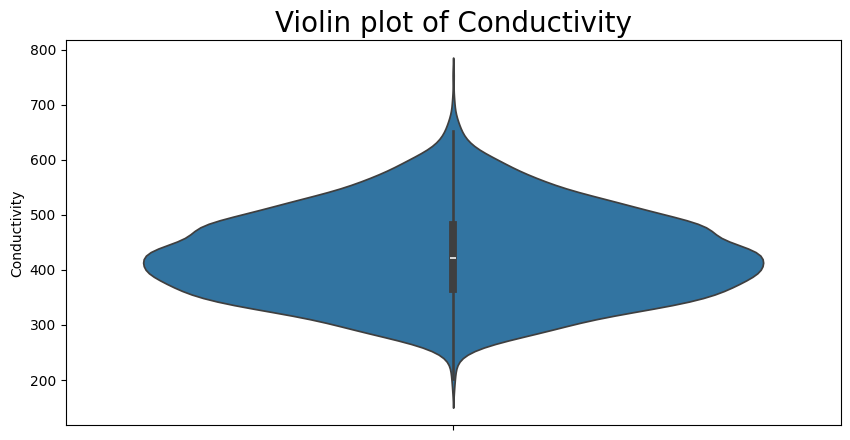

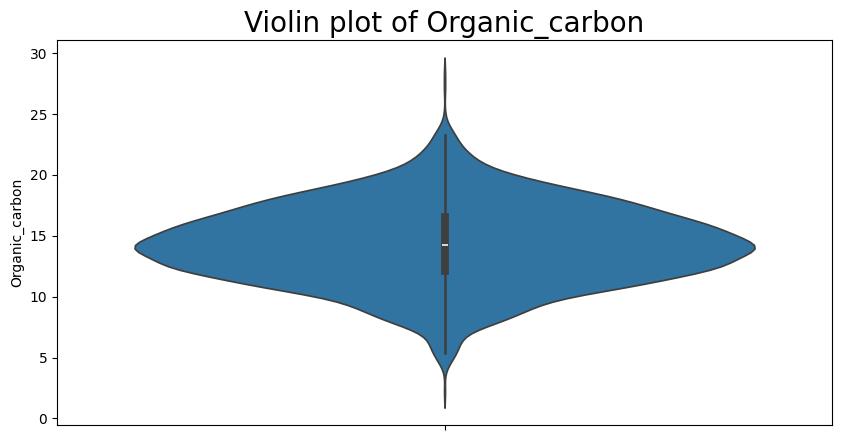

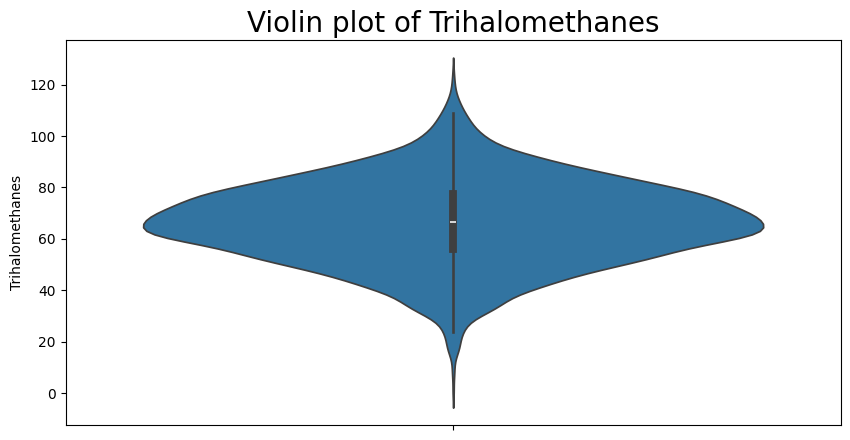

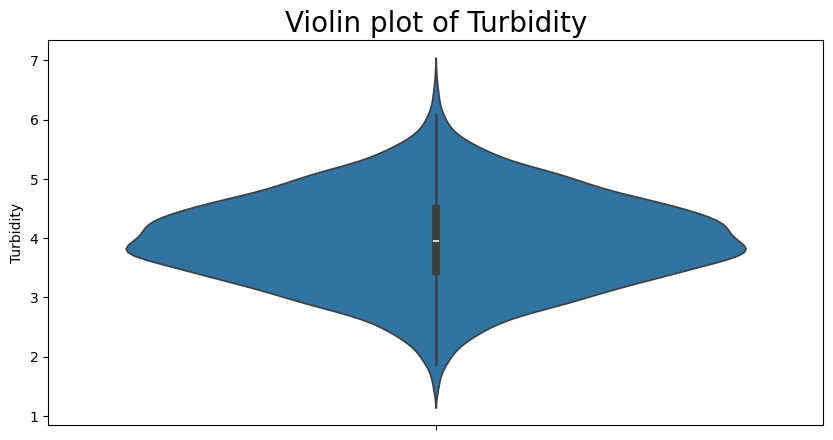

In [12]:
''' violin plot '''
for column in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(df[column])
    plt.title('Violin plot of {}'.format(column), fontsize=20);

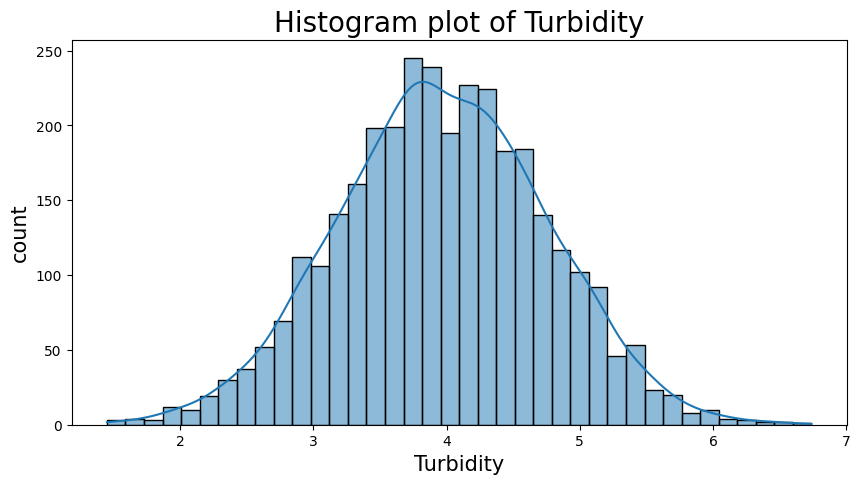

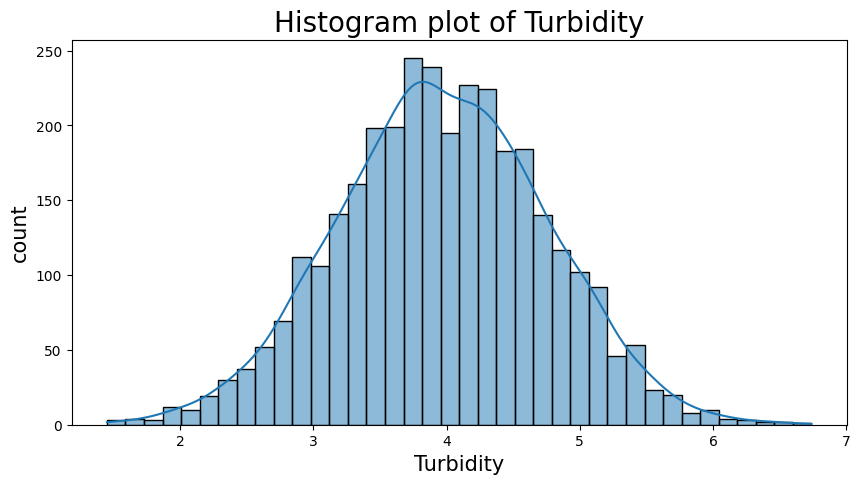

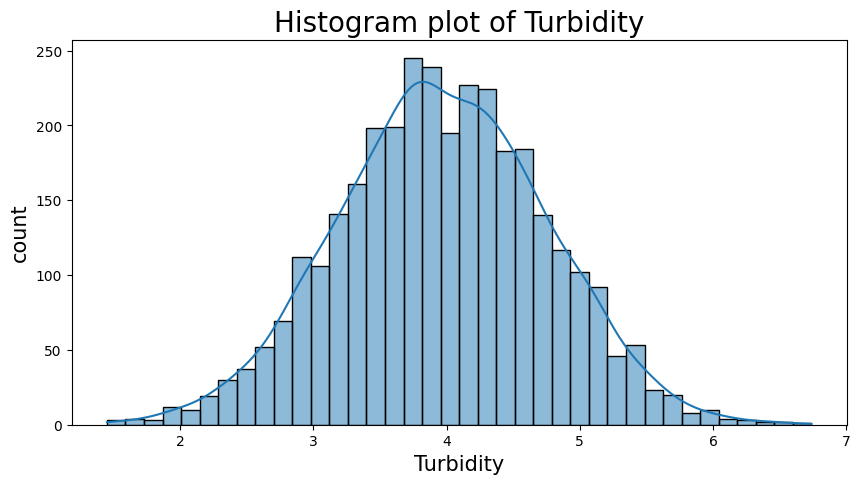

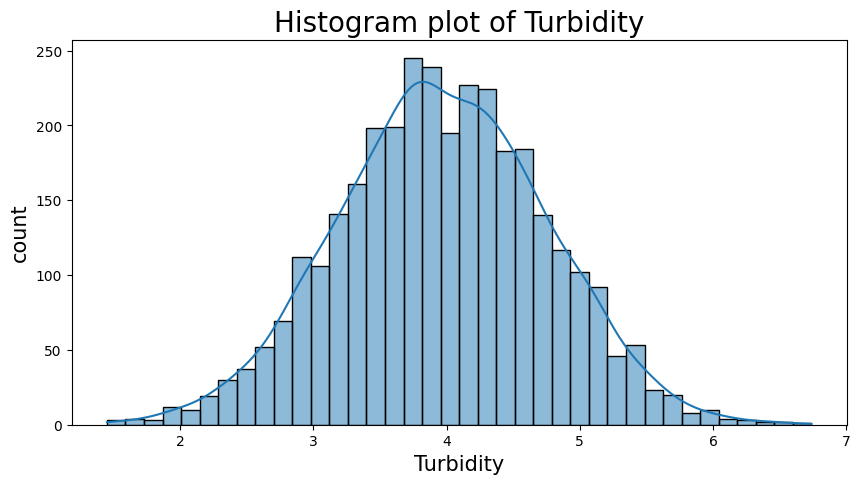

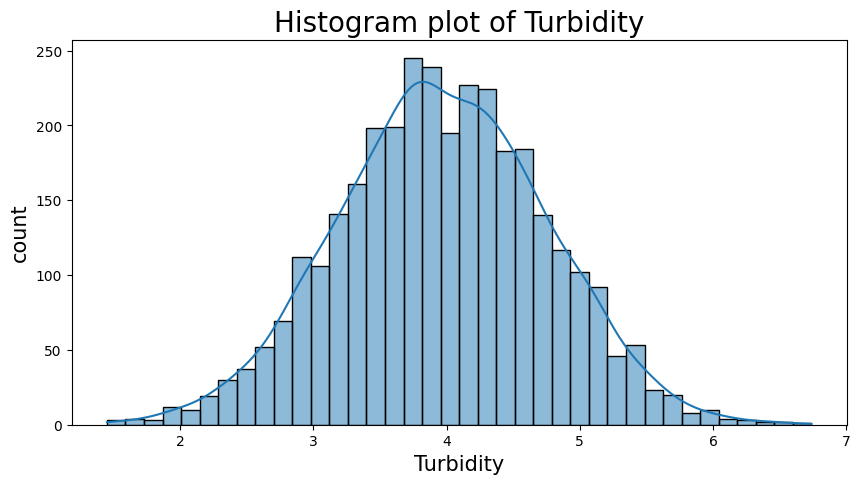

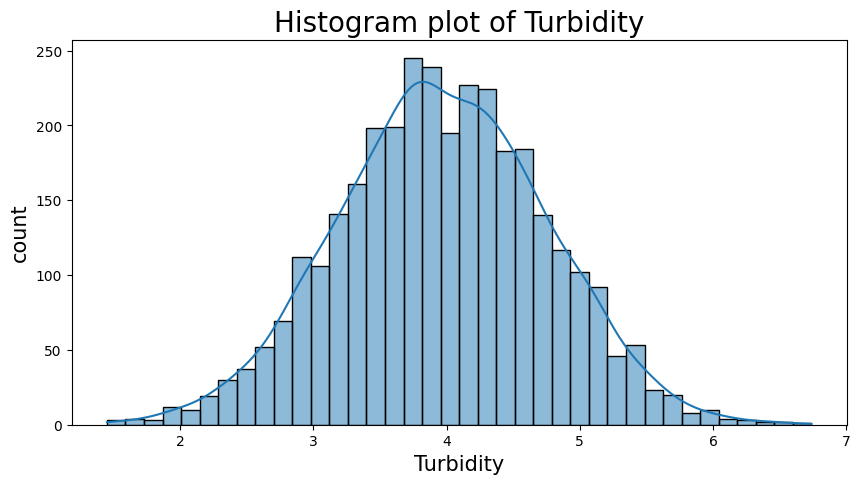

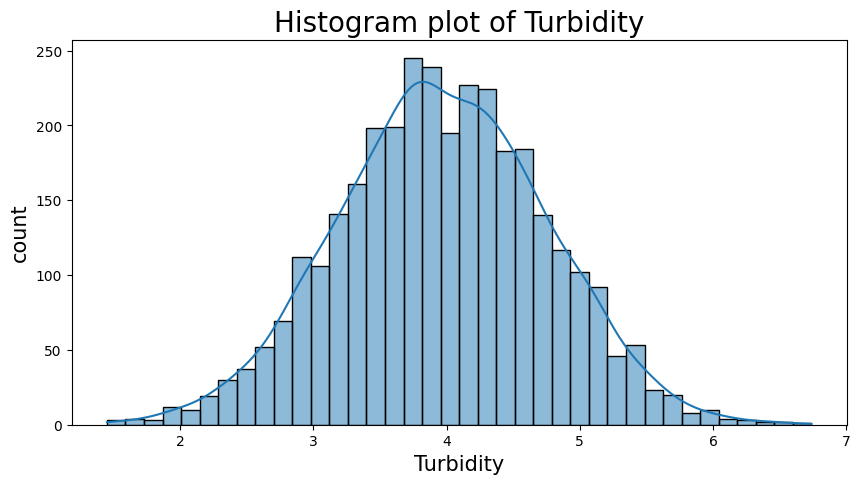

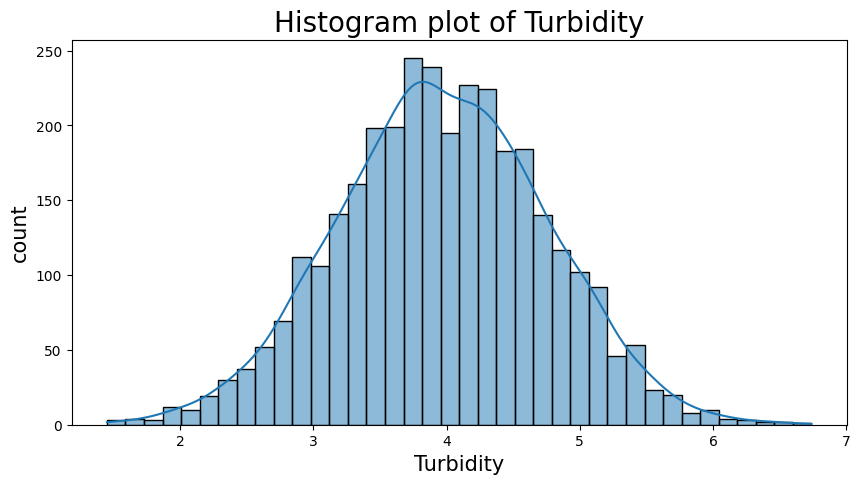

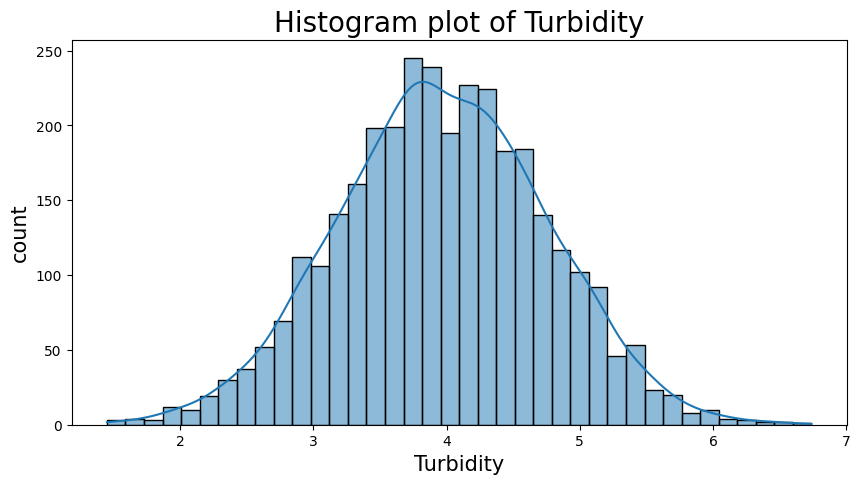

In [13]:
for freature in df.columns[:-1]:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column, fontsize=15)
    plt.ylabel('count', fontsize=15)
    plt.title('Histogram plot of {}'.format(column), fontsize=20);

In [14]:
for feature in df.columns:
    print("{} \t {:.1f}% null values".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

ph 	 15.0% null values
Hardness 	 0.0% null values
Solids 	 0.0% null values
Chloramines 	 0.0% null values
Sulfate 	 23.8% null values
Conductivity 	 0.0% null values
Organic_carbon 	 0.0% null values
Trihalomethanes 	 4.9% null values
Turbidity 	 0.0% null values
Potability 	 0.0% null values


In [15]:
ph_mean = df[df['Potability'] == 0]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['ph'].isna()), 'ph'] = ph_mean

ph_mean_1 = df[df['Potability'] == 1]['ph'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['ph'].isna()), 'ph'] = ph_mean_1

sulf_mean = df[df['Potability'] == 0]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean

sulf_mean_1 = df[df['Potability'] == 1]['Sulfate'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Sulfate'].isna()), 'Sulfate'] = sulf_mean_1

traih_mean = df[df['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 0) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = traih_mean

trah_mean_1 = df[df['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)
df.loc[(df['Potability'] == 1) & (df['Trihalomethanes'].isna()), 'Trihalomethanes'] = trah_mean_1

In [16]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.085378,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,334.564290,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.564290,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [17]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (2620, 9)
X_test shape:  (656, 9)


In [20]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

--- Logistic Regression ---
Accuracy: 0.6265
Precision: 0.0000
Recall: 0.0000
Confusion Matrix:


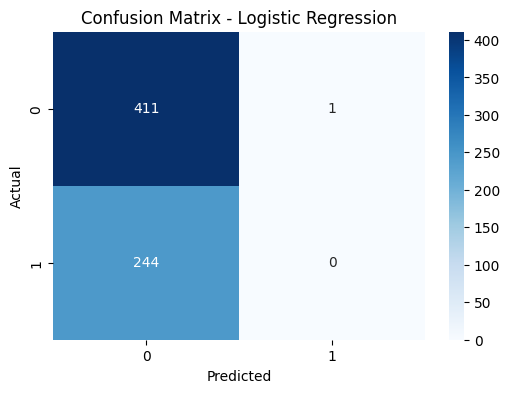

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression
print("--- Logistic Regression ---")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred, zero_division=1) # set zero_division to 1
lr_cm = confusion_matrix(y_test, lr_pred)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print("\n")

--- K-Nearest Neighbors ---
Accuracy: 0.6357
Precision: 0.5143
Recall: 0.3689
Confusion Matrix:


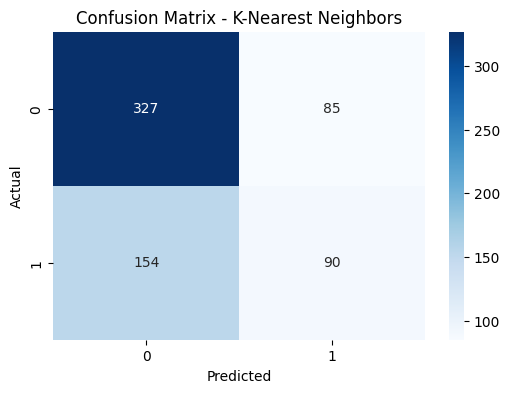

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# K-Nearest Neighbors
print("--- K-Nearest Neighbors ---")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.show()
print("\n")

--- Random Forest ---
Accuracy: 0.7988
Precision: 0.7857
Recall: 0.6311
Confusion Matrix:


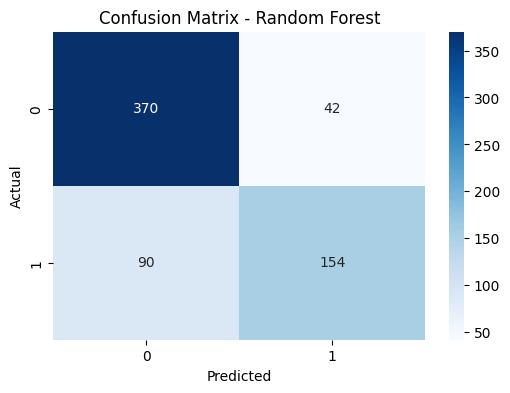

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest
print("--- Random Forest ---")
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print("\n")

--- Gaussian Naive Bayes ---
Accuracy: 0.6159
Precision: 0.4649
Recall: 0.2172
Confusion Matrix:


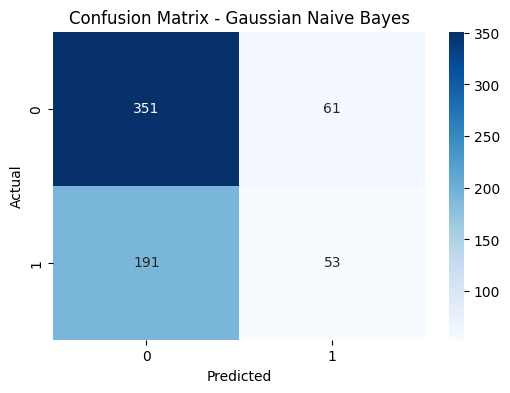

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Naive Bayes
print("--- Gaussian Naive Bayes ---")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_pred = gnb_model.predict(X_test)

gnb_accuracy = accuracy_score(y_test, gnb_pred)
gnb_precision = precision_score(y_test, gnb_pred)
gnb_recall = recall_score(y_test, gnb_pred)
gnb_cm = confusion_matrix(y_test, gnb_pred)

print(f"Accuracy: {gnb_accuracy:.4f}")
print(f"Precision: {gnb_precision:.4f}")
print(f"Recall: {gnb_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()
print("\n")

--- Support Vector Machine ---
Accuracy: 0.6829
Precision: 0.6915
Recall: 0.2664
Confusion Matrix:


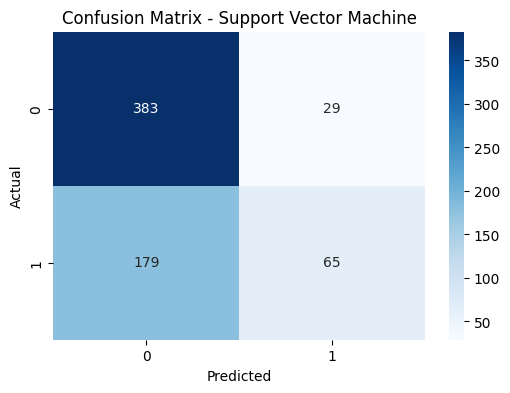

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Support Vector Machine
print("--- Support Vector Machine ---")
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred = svc_model.predict(X_test)

svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred)
svc_recall = recall_score(y_test, svc_pred)
svc_cm = confusion_matrix(y_test, svc_pred)

print(f"Accuracy: {svc_accuracy:.4f}")
print(f"Precision: {svc_precision:.4f}")
print(f"Recall: {svc_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()
print("\n")

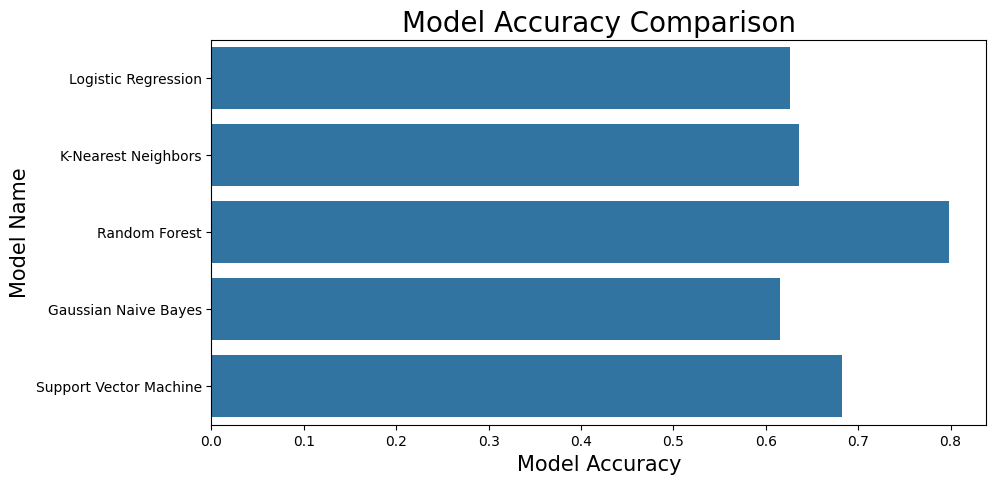

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Collect accuracy scores from individual model evaluations
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine']
model_accuracies = [lr_accuracy, knn_accuracy, rf_accuracy, gnb_accuracy, svc_accuracy]

# Create a DataFrame for plotting
model_results_df = pd.DataFrame({
    'Model Accuracy': model_accuracies,
    'Model Name': model_names
})

# Create the bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Model Accuracy', y='Model Name', data=model_results_df)
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15)
plt.title('Model Accuracy Comparison', fontsize=20)
plt.show()

--- CatBoost ---
Accuracy: 0.8018
Precision: 0.8132
Recall: 0.6066
Confusion Matrix:


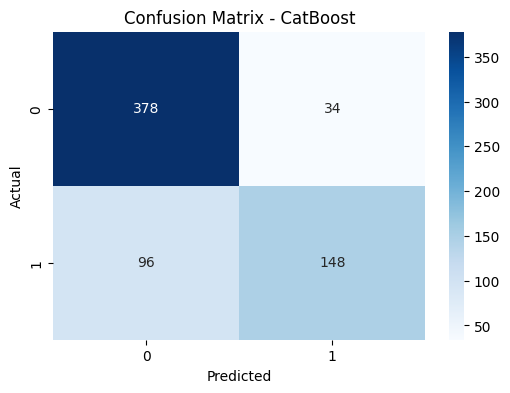



--- Decision Tree ---
Accuracy: 0.7576
Precision: 0.6793
Recall: 0.6598
Confusion Matrix:


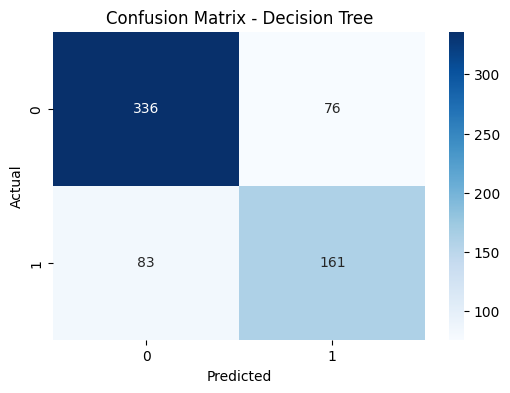

In [28]:
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# CatBoost
print("--- CatBoost ---")
catboost_model = CatBoostClassifier(verbose=0) # set verbose to 0 to suppress output
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)

catboost_accuracy = accuracy_score(y_test, catboost_pred)
catboost_precision = precision_score(y_test, catboost_pred)
catboost_recall = recall_score(y_test, catboost_pred)
catboost_cm = confusion_matrix(y_test, catboost_pred)

print(f"Accuracy: {catboost_accuracy:.4f}")
print(f"Precision: {catboost_precision:.4f}")
print(f"Recall: {catboost_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(catboost_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()
print("\n")

# Decision Tree
print("--- Decision Tree ---")
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print("\n")

--- LightGBM ---
[LightGBM] [Info] Number of positive: 1034, number of negative: 1586
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2620, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.394656 -> initscore=-0.427780
[LightGBM] [Info] Start training from score -0.427780
Accuracy: 0.8003
Precision: 0.7756
Recall: 0.6516
Confusion Matrix:


d:\Education\Coding\.conda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


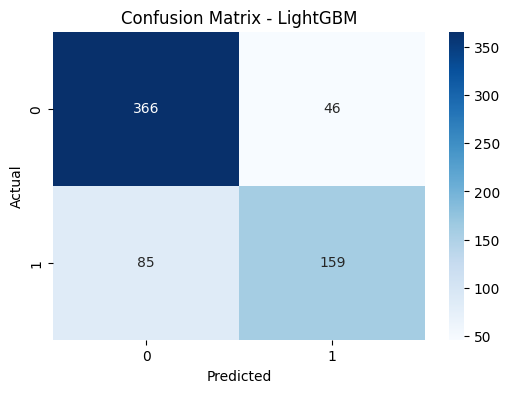

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# LightGBM
print("--- LightGBM ---")
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_cm = confusion_matrix(y_test, lgbm_pred)

print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"Precision: {lgbm_precision:.4f}")
print(f"Recall: {lgbm_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(lgbm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()
print("\n")

--- XGBoost ---
Accuracy: 0.7759
Precision: 0.7256
Recall: 0.6393
Confusion Matrix:


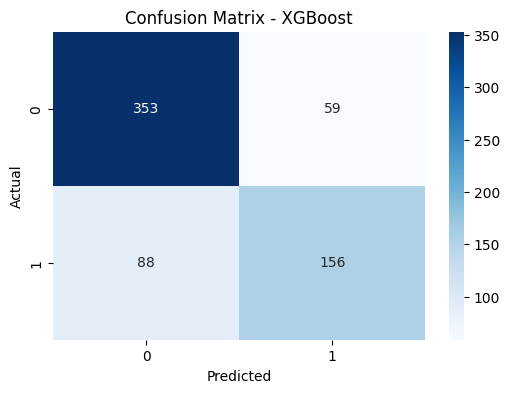

In [30]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost
print("--- XGBoost ---")
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_cm = confusion_matrix(y_test, xgb_pred)

print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print("Confusion Matrix:")
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()
print("\n")

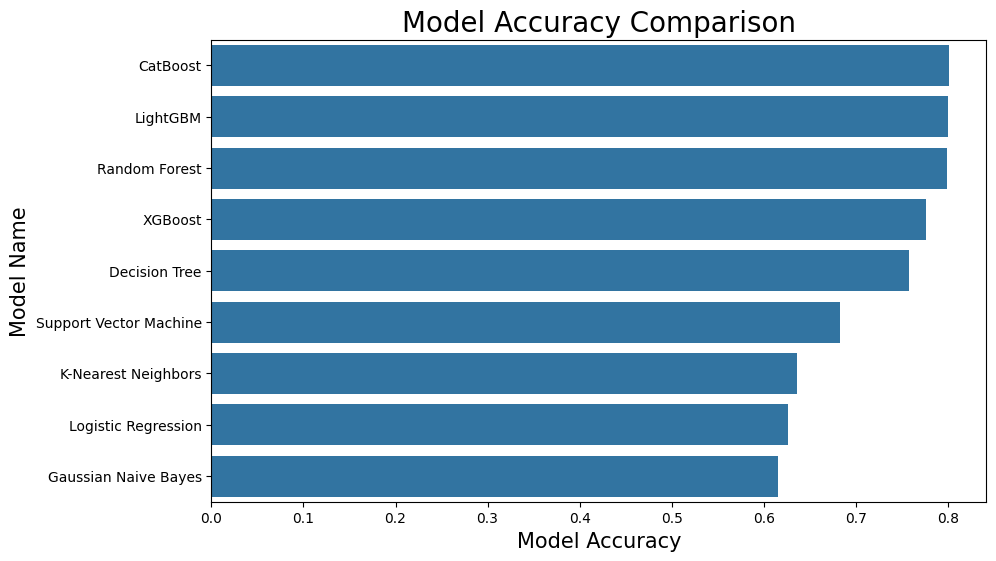

In [31]:
# Collect accuracy scores from individual model evaluations
model_names = ['Logistic Regression', 'K-Nearest Neighbors', 'Random Forest', 'Gaussian Naive Bayes', 'Support Vector Machine', 'CatBoost', 'Decision Tree', 'LightGBM', 'XGBoost']
model_accuracies = [lr_accuracy, knn_accuracy, rf_accuracy, gnb_accuracy, svc_accuracy, catboost_accuracy, dt_accuracy, lgbm_accuracy, xgb_accuracy]

# Create a DataFrame for plotting
model_results_df = pd.DataFrame({
    'Model Accuracy': model_accuracies,
    'Model Name': model_names
})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model Accuracy', y='Model Name', data=model_results_df.sort_values(by='Model Accuracy', ascending=False))
plt.xlabel('Model Accuracy', fontsize=15)
plt.ylabel('Model Name', fontsize=15)
plt.title('Model Accuracy Comparison', fontsize=20)
plt.show()

In [32]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Reshaped X_train shape: ", X_train.shape)
print("Reshaped X_test shape: ", X_test.shape)

Reshaped X_train shape:  (2620, 9, 1)
Reshaped X_test shape:  (656, 9, 1)


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Create sequential model
dl_model = Sequential()

# Add 1D convolutional layer
dl_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add pooling layer
dl_model.add(MaxPooling1D(pool_size=2))

# Flatten the output
dl_model.add(Flatten())

# Add dense layers
dl_model.add(Dense(units=64, activation='relu'))
dl_model.add(Dense(units=32, activation='relu'))

# Add final dense layer for binary classification
dl_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
dl_model.summary()

d:\Education\Coding\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,449 (33.00 KB)

 Trainable params: 8,449 (33.00 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Evaluate the model
loss, accuracy = dl_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4025 - loss: 0.7116  
Test Loss: 0.7099
Test Accuracy: 0.4329


In [40]:
# Train the model
history = dl_model.fit(X_train, y_train, epochs=50, batch_size=60, validation_split=0.2)

Epoch 1/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.1790 - val_accuracy: 0.6260 - val_loss: 1.1224
Epoch 2/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1713 - val_accuracy: 0.6374 - val_loss: 1.0792
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9430 - loss: 0.1756 - val_accuracy: 0.6584 - val_loss: 1.1334
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9447 - loss: 0.1701 - val_accuracy: 0.6221 - val_loss: 1.1312
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9481 - loss: 0.1654 - val_accuracy: 0.6508 - val_loss: 1.1434
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9462 - loss: 0.1580 - val_accuracy: 0.6412 - val_loss: 1.1703
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9577 - loss: 0.1489 - val_accuracy: 0.6374 - val_loss: 1.1733
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9499 - loss: 0.1544 - val_accuracy: 0.6431 - val_loss:

In [42]:
dl_model.save('model.keras')

In [43]:
import joblib

scaler_filename = 'scaler.pkl'
joblib.dump(sc, scaler_filename)


['scaler.pkl']

In [38]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import numpy as np
import joblib
import pandas as pd # Import pandas

# Load the trained model
try:
    model = tf.keras.models.load_model('water_potability_model.keras')
    st.success("Model loaded successfully!")
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# Load the fitted scaler
try:
    scaler = joblib.load('scaler.pkl')
    st.success("Scaler loaded successfully!")
except Exception as e:
    st.error(f"Error loading the scaler: {e}")
    st.stop()

st.title('Water Potability Prediction')

st.write("""
Enter the water quality parameters to predict if the water is potable.
""")

# Create input fields for each feature
# Ensure the order and names match the training data features
ph = st.number_input('pH', min_value=0.0, max_value=14.0, value=7.0)
hardness = st.number_input('Hardness', value=200.0)
solids = st.number_input('Solids', value=20000.0)
chloramines = st.number_input('Chloramines', value=7.0)
sulfate = st.number_input('Sulfate', value=300.0)
conductivity = st.number_input('Conductivity', value=400.0)
organic_carbon = st.number_input('Organic Carbon', value=14.0)
trihalomethanes = st.number_input('Trihalomethanes', value=60.0)
turbidity = st.number_input('Turbidity', value=4.0)


# Prediction button
if st.button('Predict Potability'):
    # Prepare the input data as a pandas DataFrame to maintain column names
    input_data = pd.DataFrame([[ph, hardness, solids, chloramines, sulfate, conductivity, organic_carbon, trihalomethanes, turbidity]],
                               columns=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'])


    # Scale the input data
    scaled_input_data = scaler.transform(input_data)

    # Reshape the input for the CNN model if necessary (samples, features, 1)
    # Check the expected input shape of your model
    model_input_shape = model.input_shape
    if len(model_input_shape) == 3: # Check if the model expects 3D input (like for Conv1D)
         reshaped_input_data = scaled_input_data.reshape(scaled_input_data.shape[0], scaled_input_data.shape[1], 1)
    else: # Otherwise, assume 2D input (like for Dense layers after Flatten)
         reshaped_input_data = scaled_input_data


    # Make prediction
    prediction = model.predict(reshaped_input_data)
    prediction_proba = prediction[0][0]

    # Display result
    if prediction_proba > 0.5:
        st.success(f'The water is predicted to be Potable (Probability: {prediction_proba:.4f})')
    else:
        st.error(f'The water is predicted to be Not Potable (Probability: {prediction_proba:.4f})')

Overwriting app.py
